# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.003767e+01     6.618178e+00
 * time: 0.005521059036254883
     1     2.813077e+01     5.735877e+00
 * time: 0.017037153244018555
     2     1.653986e+01     3.830904e+00
 * time: 0.0486299991607666
     3     1.261476e+01     2.542349e+00
 * time: 0.07683014869689941
     4     1.189201e+01     2.613532e+00
 * time: 0.0990750789642334
     5     1.106158e+01     1.602916e+00
 * time: 0.12068796157836914
     6     1.023278e+01     1.118043e+00
 * time: 0.14403700828552246
     7     9.755072e+00     1.114288e+00
 * time: 0.1662311553955078
     8     9.371369e+00     9.297428e-01
 * time: 0.1874551773071289
     9     9.334182e+00     1.265946e+00
 * time: 0.20331907272338867
    10     9.261146e+00     1.157198e+00
 * time: 0.21856904029846191
    11     9.258078e+00     1.366928e+00
 * time: 0.23390913009643555
    12     9.188560e+00     7.363462e-01
 * time: 0.24985408782958984
    13     9.104962e+00     6.890502e-01
 * time: 0

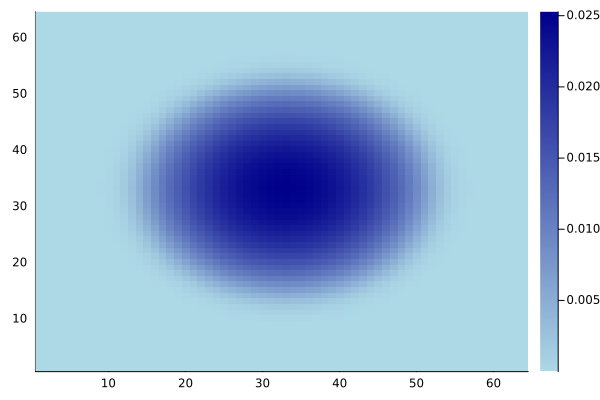

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)